In [2]:
import os
os.chdir('C:/Users/vivek/OneDrive/Desktop/glassdoor')

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [31]:
#Set Seed
np.random.seed(2020)

In [32]:
df1=pd.read_csv('SlotPerformance.csv')

In [33]:
df1.head()
df1.shape

(37757, 12)

In [34]:
df2=pd.read_csv('Location.csv')

In [35]:
df2.head()

,City_ID,City_Name,State_ID,State_Name
0,1,Rockford,OH,Ohio
1,2,Sedgewickville,MO,Missouri
2,3,Whitehouse,OH,Ohio
3,4,Victor,IA,Iowa
4,5,Pacific Junction,IA,Iowa


# Merging Slot performance and Location data

In [36]:
df=pd.merge(df1, df2, on='City_ID')

In [37]:
df.shape

(37757, 15)

In [38]:
pd.set_option('display.max_columns',None)
df.columns = map(str.lower, df.columns)

In [39]:
df.head()

,employer_id,city_id,contract_id,startdate,enddate,renewal_flag,job_slots,total_contract_value,applications,apply_start_clicks,click_market_value,job_listings,city_name,state_id,state_name
0,4277920,9767,2423796,10/30/2017,11/30/2017,1,15,995,215,255,15484.4,25,Kaser,NY,New York
1,1747093,9767,2123400,7/19/2017,8/18/2017,1,15,1745,20,145,3131.2,0,Kaser,NY,New York
2,2833227,9767,1895796,4/22/2017,5/21/2017,1,15,495,80,120,726.2,20,Kaser,NY,New York
3,1827813,9767,1283400,8/3/2016,9/2/2016,1,15,495,20,45,1852.1,0,Kaser,NY,New York
4,2234880,9767,2021376,6/12/2017,7/11/2017,1,15,745,85,95,2339.5,0,Kaser,NY,New York


In [40]:
print ("The data file has " + str(df.shape[1]) + " columns and there are " + str(df.shape[0]) + " rows")

The data file has 15 columns and there are 37757 rows


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37757 entries, 0 to 37756
Data columns (total 15 columns):
employer_id             37757 non-null int64
city_id                 37757 non-null int64
contract_id             37757 non-null int64
startdate               37757 non-null object
enddate                 37757 non-null object
renewal_flag            37757 non-null int64
job_slots               37757 non-null int64
total_contract_value    37757 non-null int64
applications            37757 non-null int64
apply_start_clicks      37757 non-null int64
click_market_value      37757 non-null float64
job_listings            37757 non-null int64
city_name               37757 non-null object
state_id                37757 non-null object
state_name              37757 non-null object
dtypes: float64(1), int64(9), object(5)
memory usage: 4.6+ MB



# Changing Startdate and Enddate to datatime datatype

In [42]:
df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37757 entries, 0 to 37756
Data columns (total 15 columns):
employer_id             37757 non-null int64
city_id                 37757 non-null int64
contract_id             37757 non-null int64
startdate               37757 non-null datetime64[ns]
enddate                 37757 non-null datetime64[ns]
renewal_flag            37757 non-null int64
job_slots               37757 non-null int64
total_contract_value    37757 non-null int64
applications            37757 non-null int64
apply_start_clicks      37757 non-null int64
click_market_value      37757 non-null float64
job_listings            37757 non-null int64
city_name               37757 non-null object
state_id                37757 non-null object
state_name              37757 non-null object
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 4.6+ MB


In [44]:
df.head()

,employer_id,city_id,contract_id,startdate,enddate,renewal_flag,job_slots,total_contract_value,applications,apply_start_clicks,click_market_value,job_listings,city_name,state_id,state_name
0,4277920,9767,2423796,2017-10-30,2017-11-30,1,15,995,215,255,15484.4,25,Kaser,NY,New York
1,1747093,9767,2123400,2017-07-19,2017-08-18,1,15,1745,20,145,3131.2,0,Kaser,NY,New York
2,2833227,9767,1895796,2017-04-22,2017-05-21,1,15,495,80,120,726.2,20,Kaser,NY,New York
3,1827813,9767,1283400,2016-08-03,2016-09-02,1,15,495,20,45,1852.1,0,Kaser,NY,New York
4,2234880,9767,2021376,2017-06-12,2017-07-11,1,15,745,85,95,2339.5,0,Kaser,NY,New York


# Missing data

In [45]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
state_name,0,0.0
state_id,0,0.0
city_name,0,0.0
job_listings,0,0.0
click_market_value,0,0.0
apply_start_clicks,0,0.0
applications,0,0.0
total_contract_value,0,0.0
job_slots,0,0.0
renewal_flag,0,0.0


There are no missing values

# Creating a column days, which is # days between startdate and enddate

In [46]:
(df['days'])=(df['enddate']-df['startdate']).dt.days

In [47]:
df.head()

,employer_id,city_id,contract_id,startdate,enddate,renewal_flag,job_slots,total_contract_value,applications,apply_start_clicks,click_market_value,job_listings,city_name,state_id,state_name,days
0,4277920,9767,2423796,2017-10-30,2017-11-30,1,15,995,215,255,15484.4,25,Kaser,NY,New York,31
1,1747093,9767,2123400,2017-07-19,2017-08-18,1,15,1745,20,145,3131.2,0,Kaser,NY,New York,30
2,2833227,9767,1895796,2017-04-22,2017-05-21,1,15,495,80,120,726.2,20,Kaser,NY,New York,29
3,1827813,9767,1283400,2016-08-03,2016-09-02,1,15,495,20,45,1852.1,0,Kaser,NY,New York,30
4,2234880,9767,2021376,2017-06-12,2017-07-11,1,15,745,85,95,2339.5,0,Kaser,NY,New York,29


In [48]:
df2=df

In [49]:
#See unique values and convert them to int using pd.getDummies()

categorical_columns = ['job_slots']
for col in categorical_columns:
    
    print(np.unique(df[col]))
# transform the categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

[15 50]


In [50]:
df.shape

(37757, 17)

In [52]:
list=df.columns
list

Index(['employer_id', 'city_id', 'contract_id', 'startdate', 'enddate',
       'renewal_flag', 'total_contract_value', 'applications',
       'apply_start_clicks', 'click_market_value', 'job_listings', 'city_name',
       'state_id', 'state_name', 'days', 'job_slots_15', 'job_slots_50'],
      dtype='object')

In [51]:
cols_to_use=['job_slots_15', 'job_slots_50', 'total_contract_value', 'applications',
       'apply_start_clicks', 'click_market_value', 'job_listings', 'days','renewal_flag']
cols_to_use_x=['job_slots_15', 'job_slots_50', 'total_contract_value', 'applications',
       'apply_start_clicks', 'click_market_value', 'job_listings', 'days']
cols_to_use_y=['renewal_flag']

In [53]:
df1=df[cols_to_use]
x=df[cols_to_use_x]
y=df[cols_to_use_y]

#Checeking for Multicollinearity

In [26]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(x, 40))

Top Absolute Correlations
job_slots_15          job_slots_50            1.000000
applications          apply_start_clicks      0.782202
apply_start_clicks    click_market_value      0.770510
applications          click_market_value      0.602342
job_slots_15          total_contract_value    0.501434
job_slots_50          total_contract_value    0.501434
apply_start_clicks    job_listings            0.312140
total_contract_value  click_market_value      0.308356
                      apply_start_clicks      0.279212
job_slots_50          job_listings            0.278940
job_slots_15          job_listings            0.278940
click_market_value    job_listings            0.276540
job_slots_15          click_market_value      0.265866
job_slots_50          click_market_value      0.265866
job_slots_15          apply_start_clicks      0.261592
job_slots_50          apply_start_clicks      0.261592
total_contract_value  applications            0.217718
applications          job_listings     

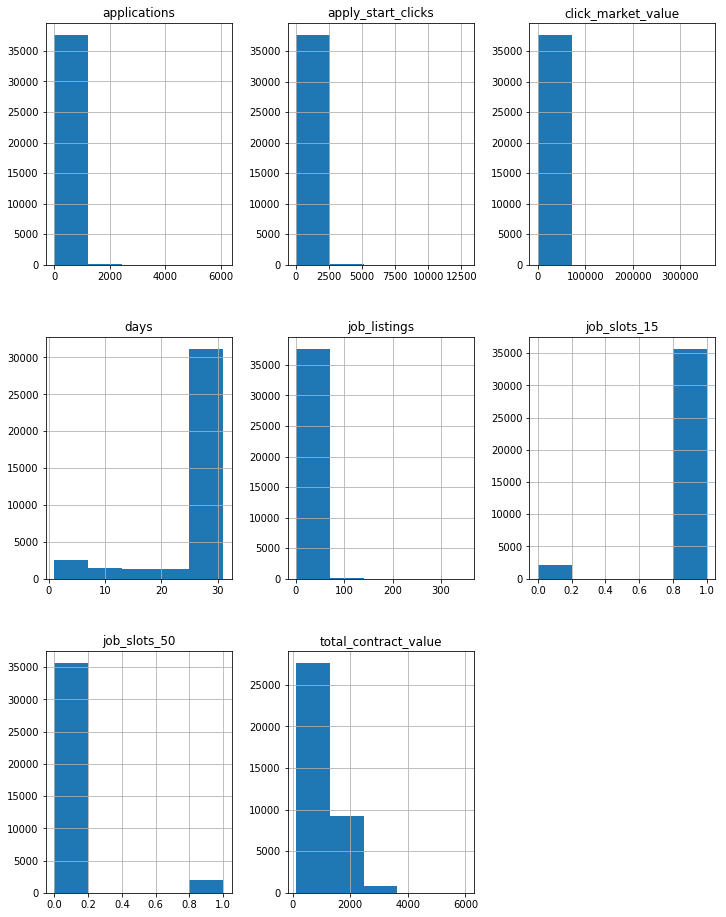

In [27]:
# Histogram of all the features to understand the distribution
x.hist(bins = 5 , figsize= (12,16)) ;

# Renewal Class Count

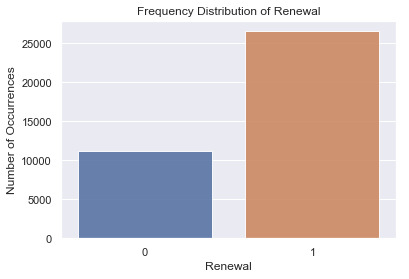

1    26558
0    11199
Name: renewal_flag, dtype: int64


1    0.703393
0    0.296607
Name: renewal_flag, dtype: float64

In [28]:
class_count1 = df['renewal_flag'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count1.index, class_count1.values, alpha=0.9)
plt.title('Frequency Distribution of Renewal')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Renewal', fontsize=12)
plt.show()
print(df['renewal_flag'].value_counts())
df.renewal_flag.value_counts(normalize=True)

About 70%(26558) of the customers renewed and 29.66%(11199) dint renew. 

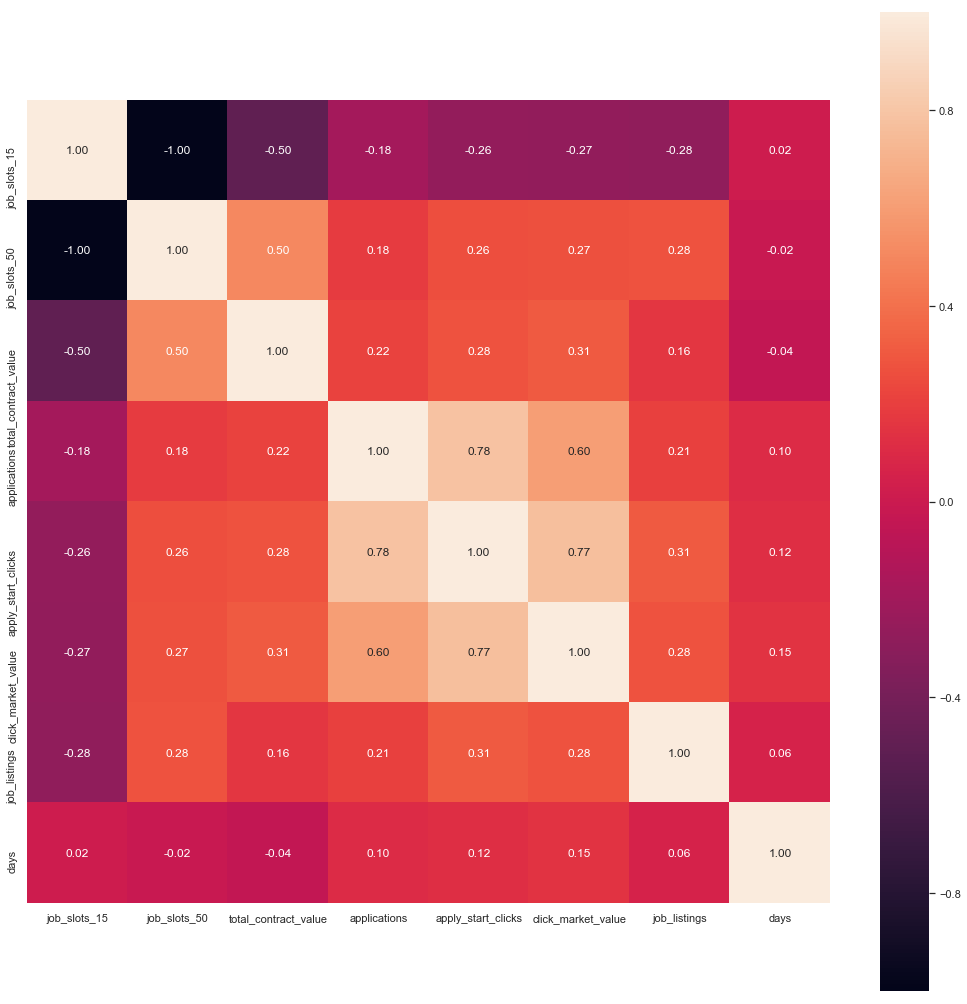

In [29]:
cor=x.corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(cor, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=cols_to_use_x, yticklabels=cols_to_use_x)
plt.show();

Statistical Analysis:

Kolmogorov–Smirnov test to check whether the distributions of each feature of churn or not are drawn from the same distribution. Proportion Z-test to check whether the difference in mean values is statistically different for features with 0/1 values.

In [58]:
df1.groupby('renewal_flag').sum()


,job_slots_15,job_slots_50,total_contract_value,applications,apply_start_clicks,click_market_value,job_listings,days
renewal_flag,,,,,,,,
0,10522.0,677.0,12168010,389225,766015,17578630.85,37755,205138
1,25183.0,1375.0,26628475,1400325,2901885,77544332.20,98195,778492


In [30]:
df2.groupby('renewal_flag').mean()

,employer_id,city_id,contract_id,job_slots,total_contract_value,applications,apply_start_clicks,click_market_value,job_listings,days
renewal_flag,,,,,,,,,,
0,3.811539e+06,5679.364229,2.086053e+06,17.115814,1086.526476,34.755335,68.400304,1569.660760,3.371283,18.317528
1,3.228410e+06,5730.769937,1.969799e+06,16.812072,1002.653626,52.727050,109.265946,2919.810686,3.697379,29.312900


In [31]:
from scipy.stats import ks_2samp
def run_KS_test(feature):
    dist1 = df2.loc[df.renewal_flag == 0,feature]
    dist2 = df2.loc[df.renewal_flag == 1,feature]
    print(feature+':')
    print(ks_2samp(dist1,dist2),'\n')

In [32]:
from statsmodels.stats.proportion import proportions_ztest
def run_proportion_Z_test(feature):
    dist1 = df2.loc[df.renewal_flag == 0,feature]
    dist2 = df2.loc[df.renewal_flag == 1,feature]
    n1 = len(dist1)
    p1 = dist1.sum()
    n2 = len(dist2)
    p2 = dist2.sum()
    z_score, p_value = proportions_ztest([p1, p2], [n1, n2])
    print(feature+':')
    print('z-score = {}; p-value = {}'.format(z_score, p_value),'\n')

In [96]:
list1=['total_contract_value', 'applications',
       'apply_start_clicks', 'click_market_value', 'job_listings', 'days']

In [97]:
for ks_element in list1:
    run_KS_test(ks_element)

total_contract_value:
Ks_2sampResult(statistic=0.11977451632681507, pvalue=1.393968622802151e-98) 

applications:
Ks_2sampResult(statistic=0.14070754813946118, pvalue=6.859651642291271e-136) 

apply_start_clicks:
Ks_2sampResult(statistic=0.1977235543169517, pvalue=6.465404226989231e-268) 

click_market_value:
Ks_2sampResult(statistic=0.23627255819675191, pvalue=0.0) 

job_listings:
Ks_2sampResult(statistic=0.020797050418171703, pvalue=0.0021962893918764793) 

days:
Ks_2sampResult(statistic=0.6107817833427983, pvalue=0.0) 



From the pvalues, we see that: All the features have pretty low p-values (<0.05), meaning that we can reject the null hypothesis that the distributions of renewed/not renewd customers are the same. The difference between the two samples are not significant. 
These features are probably relevant to our target variable.

# Feature Preprocessing

In [36]:
import random
random.seed(1) 
df3=df.sample(12000,random_state=99)

In [37]:
x1=df[cols_to_use_x]
y1=df[cols_to_use_y]

In [38]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [39]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=x1.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=x1.columns)

print("Feature space holds %d observations and %d features" % X_train.shape)
print("Unique target labels:", np.unique(y_train))

Feature space holds 30205 observations and 8 features
Unique target labels: [0 1]


# Model Training and Result Evaluation

I will evaluate and compare the following models using a cross-validated Area Under the Receiver Operating Characteristic Curve (AUROC)** score on the training set

I'll perform some hyperparameter tuning for each model to choose the most promising model, then more carefully tune the hyperparameters of the best-performing model.

In [40]:
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import  XGBClassifier

 K-fold Cross-Validation

I compare 11 of the most popular classifiers and evaluate their performance using a stratified kfold cross validation procedure.

    Logistic Regression
    Linear Discriminant Analysis
    SVC
    KNN
    Random Forest (RFC)
    Decision Tree
    Extra Trees (ExtC)
    AdaBoost (Ada)
    Gradient Boosting (GBC)
    Multiple layer perceptron (Artificial Neural Network)
    XGBoost


In [41]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=2)

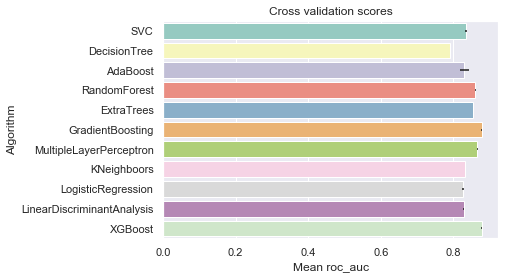

In [42]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")

I decide to choose: SVC, RandomForest, GradientBoosting, Multi Layer Perceptron, and XGBoost for further fine-tunning and the ensemble modeling

Hyperparameter tunning for best models

1.SVM

In [43]:
### SVC classifier
svm = SVC(probability=True)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,1000]}

grid_svm = GridSearchCV(svm, param_grid = svm_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_svm.fit(X_train,y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 68.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [44]:
svm_best = grid_svm.best_estimator_
# Best score
print('Best Score:', grid_svm.best_score_)
print('Best parameters set: \n', grid_svm.best_params_)

Best Score: 0.8445773218112089
Best parameters set: 
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [45]:
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:,1]

Random Forest

In [46]:
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs

In [47]:
rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.8692886754017757
Best parameters set: 
 {'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [48]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]


Gradient Boosting

In [49]:
# Gradient boosting tunning
gb = GradientBoostingClassifier(random_state=random_state)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200],
              'learning_rate': [0.1, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_gb.fit(X_train,y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.5s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:   50.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  random_state=42,
                                                  subsample=1.0, tol=0.0001,
           

In [50]:
gb_best = grid_gb.best_estimator_
# Best score
print('Best Score:', grid_gb.best_score_)
print('Best parameters set: \n', grid_gb.best_params_)

Best Score: 0.877052323577584
Best parameters set: 
 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 100}


In [51]:
y_pred_gb = gb_best.predict(X_test)
y_prob_gb = gb_best.predict_proba(X_test)[:,1]

XGBoost

In [53]:
xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:   31.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
              

In [54]:
xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.879085608705586
Best parameters set: 
 {'learning_rate': 0.05, 'max_depth': 5, 'subsample': 1.0}


In [75]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

Multi Layer Perceptron:

In [63]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation):
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [68]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=60, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(activation=activation)
grid_nn= GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=kfold,scoring="roc_auc")
grid_nn.fit(X_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000029ADFA32BA8>,
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [69]:
nn_best = grid_nn.best_estimator_
# Best score
print('Best Score:', grid_nn.best_score_)
print('Best parameters set: \n', grid_nn.best_params_)

Best Score: 0.8595625516146104
Best parameters set: 
 {'activation': 'tanh'}


In [76]:
y_pred_nn = nn_best.predict(X_test)
y_prob_nn = nn_best.predict_proba(X_test)[:,1]

Comparing the best models:

I will take a closer look of the selected models: SVM, Random Forest, Gradient Boosting, XGBoost and ANN.

    Learning Curve
    Confusion Matrix


Plot learning curves:

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.


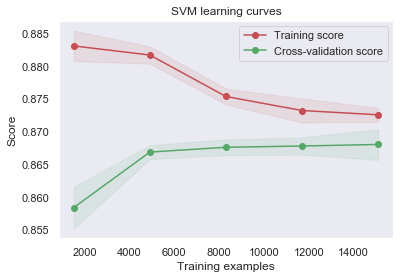

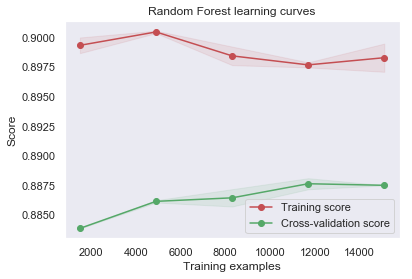

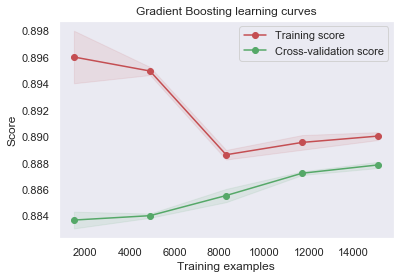

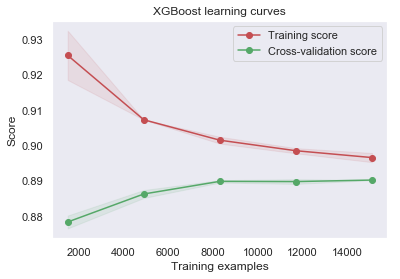

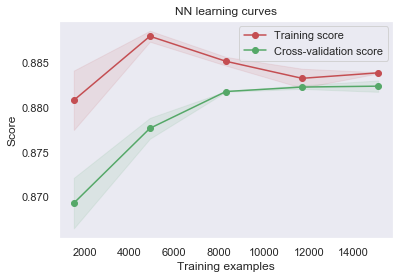

In [71]:
# Plot learning curves
#grid_svm, grid_rf, grid_gb, grid_xgb, grid_nn

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_svm.best_estimator_,"SVM learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_gb.best_estimator_,"Gradient Boosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_nn.best_estimator_,"NN learning curves",X_train,y_train,cv=kfold)


Calculate Confusion Matrix (Precision, Recall, Accuracy)

In [72]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not Renewed','Renewed']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
Gradient Boosting
Accuracy is 0.8867849576271186
Precision is 0.8651079136690647
Recall is 0.9943619620372111
F1 score is 0.9252426335577512
ROC AUC is 0.8750449303525832


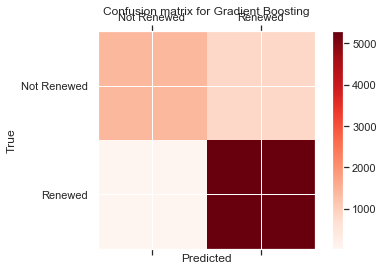

Artificial Neural Network
Accuracy is 0.8820180084745762
Precision is 0.8602797657774887
Recall is 0.9939860928396917
F1 score is 0.9223123201674078
ROC AUC is 0.8560039797320411


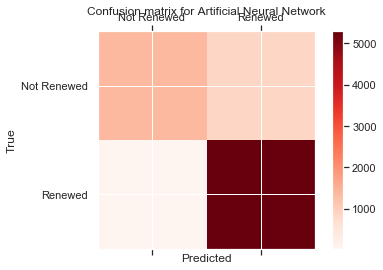

Random Forest
Accuracy is 0.887447033898305
Precision is 0.8690771008750207
Recall is 0.989287727870701
F1 score is 0.9252944278432061
ROC AUC is 0.865503521941554


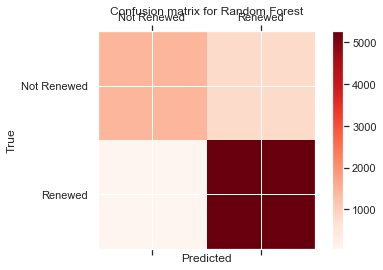

Support Vector Machine
Accuracy is 0.8704978813559322
Precision is 0.8471622701838529
Recall is 0.9958654388272881
F1 score is 0.9155148583275742
ROC AUC is 0.8380652389983079


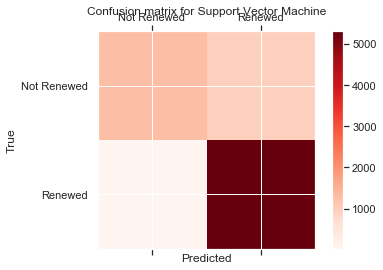

XGBoost Classifier
Accuracy is 0.8908898305084746
Precision is 0.8733189440478167
Recall is 0.9885359894756625
F1 score is 0.9273624823695346
ROC AUC is 0.877262070038533


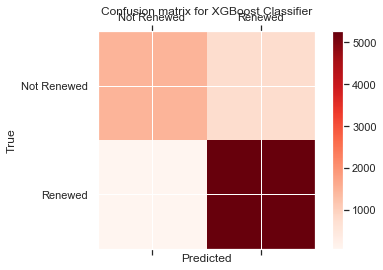

In [77]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("Gradient Boosting", confusion_matrix(y_test, y_pred_gb), roc_auc_score(y_test, y_prob_gb)),
    ("Artificial Neural Network", confusion_matrix(y_test, y_pred_nn), roc_auc_score(y_test, y_prob_nn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("Support Vector Machine", confusion_matrix(y_test, y_pred_svm), roc_auc_score(y_test, y_prob_svm)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
    
]

draw_confusion_matrices(confusion_matrices)

XGBoost gives the best accuracy.

Feature importance of tree based classifiers

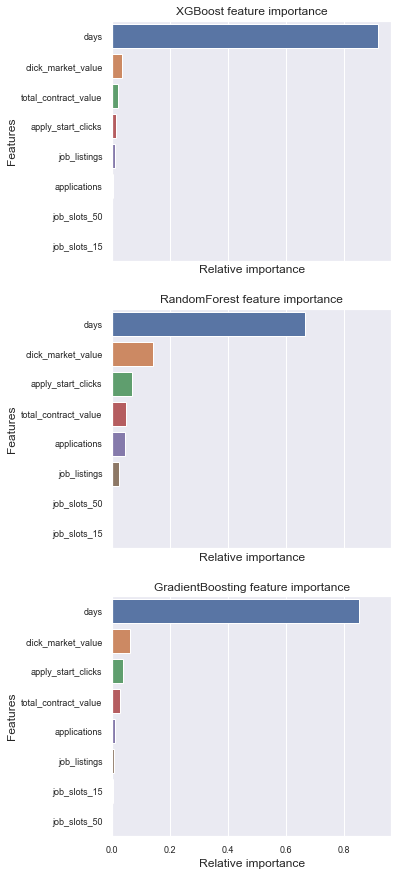

In [78]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("XGBoost", xgb_best),("RandomForest",rf_best),("GradientBoosting",gb_best),("GradientBoosting",gb_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

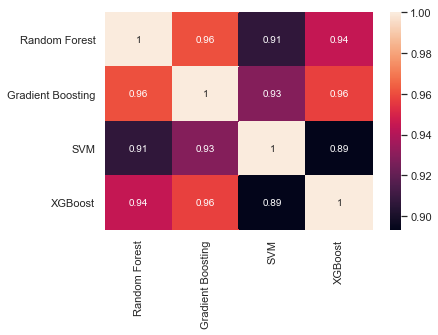

In [92]:
# Concatenate all classifier results

test_rf = pd.Series(rf_best.predict(X_test), name="Random Forest")
test_gb = pd.Series(gb_best.predict(X_test), name="Gradient Boosting")
#test_nn = pd.Series(nn_best.predict(X_test), name="ANN")
test_svm = pd.Series(svm_best.predict(X_test), name="SVM")
test_xgb = pd.Series(xgb_best.predict(X_test), name="XGBoost")


ensemble_results = pd.concat([test_rf,test_gb, test_svm, test_xgb],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote.


Ensemble modeling:

I chosed a voting classifier to combine the predictions coming from the 5 classifiers.

I preferred to pass the argument "soft" to the voting parameter to take into account the probability of each vote.


In [81]:
votingC = VotingClassifier(estimators=[('rf', rf_best),
('svm', svm_best), ('gb',gb_best),('xgb',xgb_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [82]:
y_pred_voting = votingC.predict(X_test)
y_prob_voting = votingC.predict_proba(X_test)[:,1]

Ensemble modeling
Accuracy is 0.8850635593220338
Precision is 0.8625631004722358
Recall is 0.9954895696297689
F1 score is 0.9242715058454022
ROC AUC is 0.8748863947564982


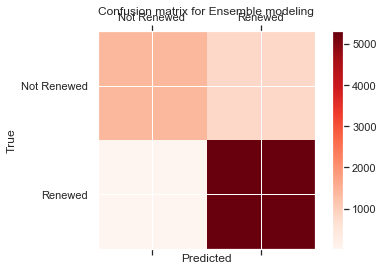

In [83]:
confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(y_test, y_pred_voting), roc_auc_score(y_test, y_prob_voting))   ]
draw_confusion_matrices(confusion_matrices)


XGBoost for predictions:

Again, the goal is to predict user churn.

I will display the XGBoost results below, as a reminder.


XGboost
Accuracy is 0.8908898305084746
Precision is 0.8733189440478167
Recall is 0.9885359894756625
F1 score is 0.9273624823695346
ROC AUC is 0.877262070038533


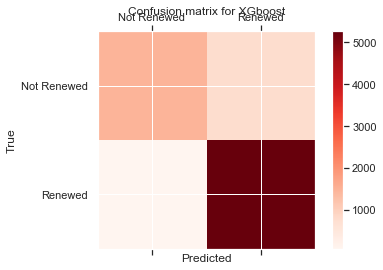

In [84]:
confusion_matrices = [
    ("XGboost", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
]

draw_confusion_matrices(confusion_matrices)

Next, I will try to determine the optimal threshold. As true positive rate and recall are actually equal, therefore, one can use a lower threshold(<0.5) to achieve higher recall rate.

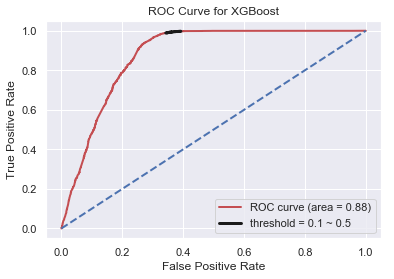

In [85]:
# make the ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_prob_xgb, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

I will check how different evaluation metrics change with the threshold

In [87]:
acc_grid = np.zeros(thresh.shape)
prec_grid = np.zeros(thresh.shape)
recall_grid = np.zeros(thresh.shape)
TP_grid = np.zeros(thresh.shape)
FP_grid = np.zeros(thresh.shape)
FN_grid = np.zeros(thresh.shape)

for i in range(thresh.shape[0]):
    cm = confusion_matrix(y_test, y_prob_xgb >= thresh[i])
    acc_grid[i] = accuracy_score(y_test, y_prob_xgb >= thresh[i])
    prec_grid[i] = precision_score(y_test, y_prob_xgb >= thresh[i])
    recall_grid[i] = recall_score(y_test, y_prob_xgb >= thresh[i])
    TP_grid[i] = cm[1][1]
    FP_grid[i] = cm[0][1]
    FN_grid[i] = cm[1][0]

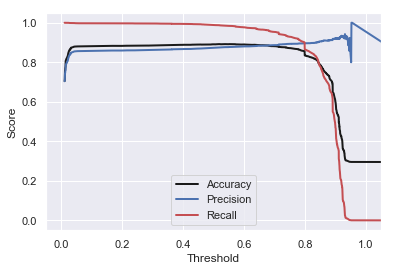

In [89]:
fig = plt.figure()
plt.plot(thresh, acc_grid, color='k', lw=2, label='Accuracy')
plt.plot(thresh, prec_grid, color='b', lw=2, label='Precision')
plt.plot(thresh, recall_grid, color='r', lw=2, label='Recall')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc="lower center")
plt.show()

Number of Unique Customers:

In [62]:
u=df2
u.sort_values("employer_id",inplace=True)
u.drop_duplicates(subset="employer_id",keep=False,inplace=True)
print("The Number of Unique Customers:",len(u))

The Number of Unique Customers: 4419
